## Bag of words

La méthode de vectorisation Bag of Words (BoW) en NLP consiste à représenter un document textuel sous forme d'un vecteur où chaque élément correspond à la fréquence d'un mot dans le document. Cette approche ignore l'ordre des mots dans le texte et ne prend en compte que leur présence. Ainsi, chaque document est représenté par un vecteur de longueur égale au nombre total de mots dans le vocabulaire, où chaque élément du vecteur correspond à la fréquence du mot correspondant dans le document. Cette représentation permet de transformer des données textuelles en données numériques exploitables par les modèles de machine learning.

## TF-IDF 
La fréquence du terme (TF), qui mesure le nombre de fois qu'un terme apparaît dans un document. Plus un terme apparaît fréquemment dans un document, plus il est important pour ce document. L'inverse de la fréquence du document (IDF), qui mesure à quel point un terme est commun ou rare à travers tous les documents du corpus.

En multipliant la fréquence du terme par l'inverse de la fréquence du document, on obtient une mesure TF-IDF qui permet de représenter l'importance d'un terme dans un document par rapport à l'ensemble du corpus. Les termes ayant une forte valeur TF-IDF sont ceux qui sont fréquents dans le document mais rares dans le corpus, ce qui les rend plus discriminants pour la recherche d'informations.

Dans ce notebook, nous essayons d'entraîner tous les modèles que nous avons testés dans le code principal. L'objectif est de déterminer s'il est intéressant d'utiliser la vectorisation Bag of Words (ou BOF) ou bien TF-IDF.

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer,  WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re
import numpy as np
from sklearn.metrics import *
from skimpy import skim
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import warnings
import time
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import seaborn as sns

Nous commençons par charger nos données à partir d'un fichier CSV.

In [2]:

df = pd.read_csv('../data/train.csv')
df

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\r\n\r\nThis is a letter to...",3
...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2
17303,ffddf1f,Technology has changed a lot of ways that we l...,4
17304,fff016d,If you don't like sitting around all day than ...,2
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1


In [3]:
X = df["full_text"]
X

0        Many people have car where they live. The thin...
1        I am a scientist at NASA that is discussing th...
2        People always wish they had the same technolog...
3        We all heard about Venus, the planet without a...
4        Dear, State Senator\r\n\r\nThis is a letter to...
                               ...                        
17302    the story " The Challenge of Exploing Venus " ...
17303    Technology has changed a lot of ways that we l...
17304    If you don't like sitting around all day than ...
17305    In "The Challenge of Exporing Venus," the auth...
17306    Venus is worthy place to study but dangerous. ...
Name: full_text, Length: 17307, dtype: object

In [4]:
y = df["score"]
y

0        3
1        3
2        4
3        4
4        3
        ..
17302    2
17303    4
17304    2
17305    1
17306    2
Name: score, Length: 17307, dtype: int64

Nous procédons au prétraitement de nos données.

In [5]:
# Initialize the PorterStemmer
stemmer =  PorterStemmer()

def preprocess_text(text):
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    # Join the stemmed words back into a sentence
    stemmed_text = " ".join(stemmed_words)
    
    return stemmed_text

X = X.apply(preprocess_text)
X

0        mani peopl car live . thing n't know use car a...
1        scientist nasa discuss `` face '' mar . explai...
2        peopl alway wish technolog seen movi , best ne...
3        heard venu , planet without almost oxygen eart...
4        dear , state senat letter argu favor keep elec...
                               ...                        
17302    stori `` challeng explo venu `` inform piec da...
17303    technolog chang lot way live today . nowaday p...
17304    n't like sit around day great opportun partici...
17305    `` challeng expor venu , '' author suggest stu...
17306    venu worthi place studi danger . reaosn thei c...
Name: full_text, Length: 17307, dtype: object

Ici, nous essayons de créer deux vecteurs résultants différents : le premier résulte de la vectorisation Bag of Words et le deuxième représente la vectorisation TF-IDF.

In [6]:
vectorizer = CountVectorizer(max_features=5000)
vectors = vectorizer.fit_transform(X).toarray()

scaler = StandardScaler()

vectors_modified = scaler.fit_transform(vectors)
pca = PCA(n_components=100)

X1 = pca.fit_transform(vectors_modified)



In [7]:
vectorizer2 = TfidfVectorizer(max_features=5000)
vectors2 = vectorizer.fit_transform(X).toarray()

vectors_modified2 = scaler.fit_transform(vectors2)
pca = PCA(n_components=100)

X2 = pca.fit_transform(vectors_modified2)


Maintenant, nous entraînons les deux ensembles de données séparément afin de pouvoir comparer les scores d'exactitude obtenus entre les deux méthodes pour les cinq modèles différents.

In [8]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

In [9]:


# Initialize models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Machine', SVC(kernel='linear')),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('MLP Classifier', MLPClassifier(max_iter=1000))
]

accuracies = []
precisions = []
recalls = []
f1s =  []
conf_matrixs = []
execution_times = []


# Train and evaluate each model
for model in models:
    start_time = time.time()
    print(f"{model[0]} ")
    model[1].fit(X_train1, y_train1)
    end_time = time.time()

    execution_times.append(end_time - start_time)
    y_pred1 = model[1].predict(X_test1)


    # Calculate accuracy
    accuracy = accuracy_score(y_test1, y_pred1)
    accuracies.append(accuracy)

    # Calculate precision
    precision = precision_score(y_test1, y_pred1, average='weighted')
    precisions.append(precision)

    # Calculate recall
    recall = recall_score(y_test1, y_pred1, average='weighted')
    recalls.append(recall)

    # Calculate F1-score
    f1 = f1_score(y_test1, y_pred1, average='weighted')
    f1s.append(f1)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test1, y_pred1)
    conf_matrixs.append(conf_matrix)

warnings.filterwarnings("ignore")

Logistic Regression 
Support Vector Machine 
Random Forest Classifier 


c:\Users\keske\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Classifier 
MLP Classifier 


In [10]:


# Initialize models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Support Vector Machine', SVC(kernel='linear')),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('MLP Classifier', MLPClassifier(max_iter=1000))
]

accuracies2 = []
precisions2 = []
recalls2 = []
f1s2 =  []
conf_matrixs2 = []
execution_times2 = []


# Train and evaluate each model
for model in models:
    start_time = time.time()
    print(f"{model[0]} ")
    model[1].fit(X_train2, y_train2)
    end_time = time.time()

    execution_times.append(end_time - start_time)
    y_pred2 = model[1].predict(X_test2)


    # Calculate accuracy
    accuracy = accuracy_score(y_test2, y_pred2)
    accuracies2.append(accuracy)

    # Calculate precision
    precision = precision_score(y_test2, y_pred2, average='weighted')
    precisions2.append(precision)

    # Calculate recall
    recall = recall_score(y_test2, y_pred2, average='weighted')
    recalls2.append(recall)

    # Calculate F1-score
    f1 = f1_score(y_test2, y_pred2, average='weighted')
    f1s2.append(f1)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test2, y_pred2)
    conf_matrixs2.append(conf_matrix)

warnings.filterwarnings("ignore")

Logistic Regression 
Support Vector Machine 
Random Forest Classifier 
Gradient Boosting Classifier 
MLP Classifier 


Voici un diagramme comparatif des différentes valeurs d'accuracy entre les cinq modèles différents.

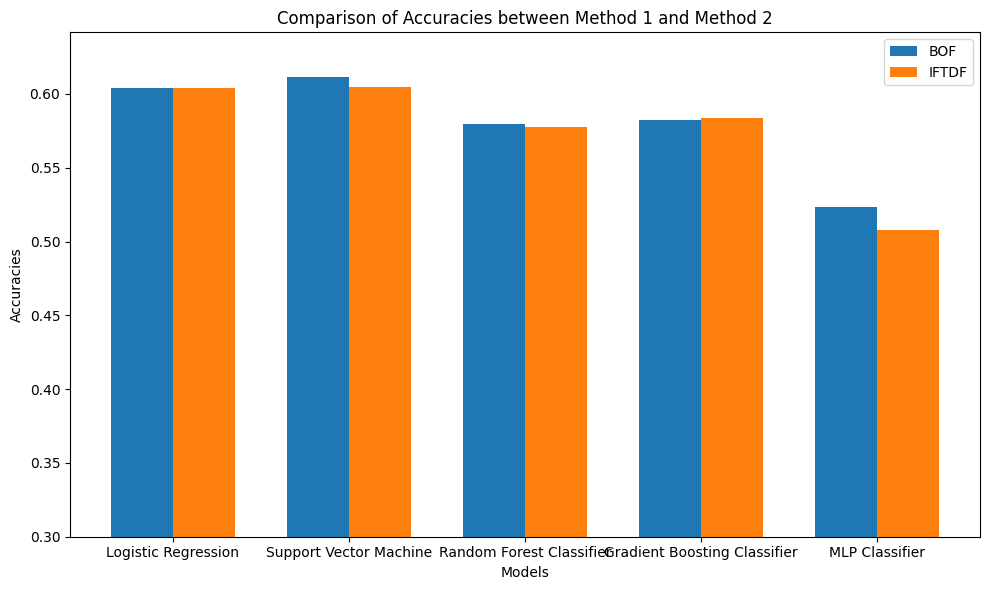

In [11]:
x = np.arange(len(models))
width = 0.35  # Largeur des barres

# Création du plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracies, width, label='BOW')
bars2 = ax.bar(x + width/2, accuracies2, width, label='TF-TDF')

ax.set_ylim(0.3)

# Ajout des étiquettes, des titres, et des légendes
ax.set_xlabel('Models')
ax.set_ylabel('Accuracies')
ax.set_title('Comparison of Accuracies between BOW  and TF-IDF')
ax.set_xticks(x)
ax.set_xticklabels([model[0] for model in models])
ax.legend()

# Affichage du plot
plt.tight_layout()
plt.show()

## Conclusion : 


Après avoir testé les deux méthodes de NLP, à savoir Bag of Words et TF-IDF, il est intéressant de constater que la méthode Bag of Words semble avoir obtenu des performances d'accuracy légèrement supérieures à celles de TF-IDF. Cette observation peut être attribuée à plusieurs facteurs.

Tout d'abord, la méthode Bag of Words est plus simple et directe, consistant simplement à compter les occurrences de chaque mot dans un document, sans prendre en compte leur importance relative. Cela peut être bénéfique dans certains cas, notamment lorsque les documents sont relativement courts et que la fréquence des mots est un indicateur significatif de leur pertinence.

D'autre part, TF-IDF, en prenant en compte à la fois la fréquence des mots et leur importance dans le corpus entier, peut être plus efficace pour gérer des documents plus longs ou des ensembles de données où la fréquence des mots peut varier considérablement. Cependant, cette approche peut également être plus sensible au bruit et aux mots peu fréquents qui peuvent introduire du biais dans la représentation des données.

Dans notre cas, la nature des données ou la spécificité du problème peuvent favoriser la simplicité et la robustesse de la méthode Bag of Words, conduisant à des performances légèrement supérieures en termes d'accuracy. Cela souligne l'importance de choisir la méthode qui convient le mieux au contexte spécifique de chaque problème de NLP, en tenant compte de divers facteurs tels que la longueur des documents, la distribution des mots et la complexité du langage.